In [5]:
# importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
train.shape

(103904, 25)

In [8]:
test.shape

(25976, 25)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [10]:
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
train.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [12]:
train.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
test.drop(labels=["Unnamed: 0"],axis=1,inplace=True)

In [13]:
train.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [14]:
train["satisfaction"]=[1 if i == "satisfied" else 0 for i in train['satisfaction']]
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


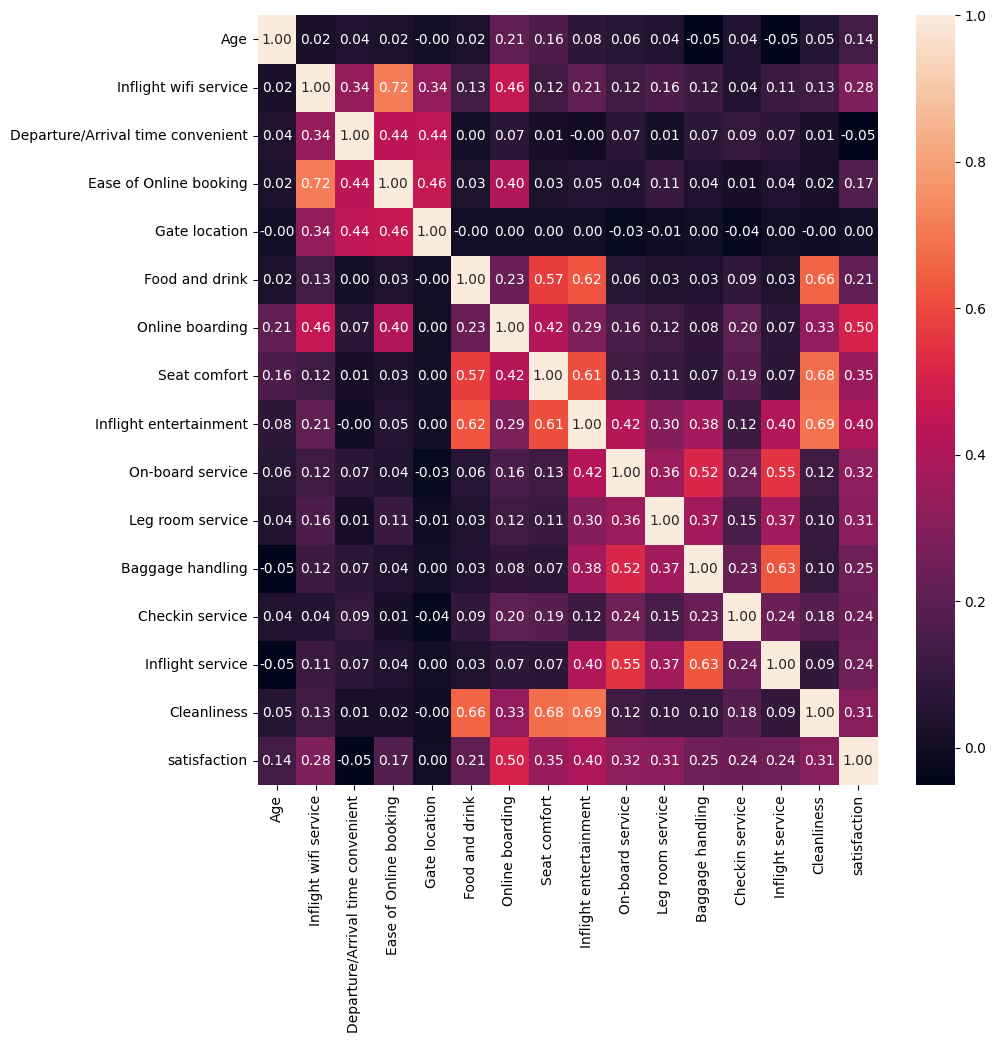

In [15]:
plt.figure(figsize=(10,10))
list1=['Age','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction']
sns.heatmap(train[list1].corr(),annot=True,fmt=".2f")
plt.show()

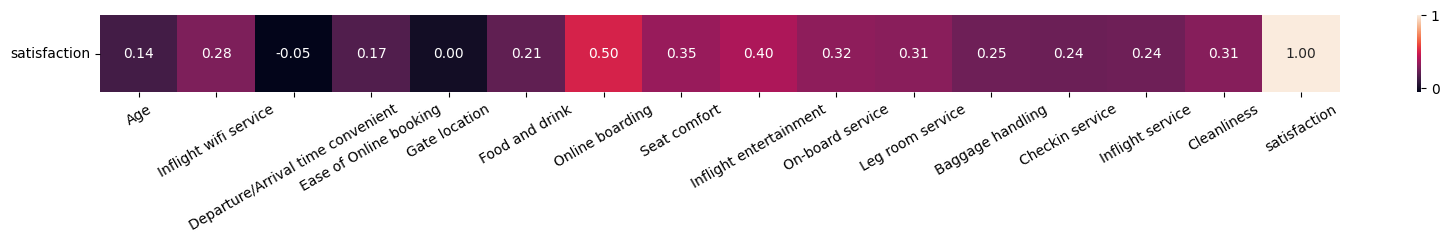

In [16]:
plt.figure(figsize=(20,1))
list1=['Age','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction']
corr_matrix = train[list1].corr()
type(corr_matrix)
sns.heatmap(corr_matrix.iloc[15:16,0:],annot=True,fmt=".2f")
plt.yticks(rotation=0)
plt.xticks(rotation=30)
plt.show()

In [17]:
numerical_features = train.select_dtypes(exclude=['object']).copy()
numerical_features = numerical_features.columns.tolist()
numerical_features

['id',
 'Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [18]:
train.head()
train.shape

(103904, 24)

In [19]:
def remove_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # IQR
    IQR= Q3-Q1
    fence_low  = Q1-1.5*IQR
    fence_high = Q3+1.5*IQR
    df = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df

In [20]:
for i in numerical_features:
    train = remove_outliers(train,i)

train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000,66031.000000
mean,66070.577895,39.518877,1147.439793,2.761991,3.101619,2.767609,2.962805,3.244294,3.326922,3.504778,3.413397,3.486196,3.403205,3.717315,3.645772,3.741818,3.349033,2.183005,1.369084,0.477624
std,37215.272754,15.102361,931.586396,1.354389,1.540007,1.409338,1.286321,1.319849,1.356179,1.315630,1.328622,1.260841,1.302435,1.171713,0.983282,1.158423,1.298719,4.856147,2.940235,0.499503
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,34094.500000,27.000000,407.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,66958.000000,40.000000,834.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97179.500000,51.000000,1713.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,1.000000,0.000000,1.000000
max,129880.000000,85.000000,3736.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,29.000000,12.000000,1.000000


In [21]:
train.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [22]:
train.drop(labels=['id'],axis=1,inplace=True)
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,1
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,0


In [23]:
ca_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for i in ca_features:
    train = pd.get_dummies(train,columns=[i])
train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
2,26,1142,2,2,2,2,5,5,5,5,...,1,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,1,0,1,1,0,1,0,1,0,0
5,26,1180,3,4,2,1,1,2,1,1,...,0,1,0,1,0,0,1,0,1,0
7,52,2035,4,3,4,4,5,5,5,5,...,1,1,0,1,0,1,0,1,0,0
8,41,853,1,2,2,2,4,3,3,1,...,0,1,0,1,0,1,0,1,0,0


In [24]:
# check missing values for test data
test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [25]:
# fill missing values with mean
np.mean(test["Arrival Delay in Minutes"])
test["Arrival Delay in Minutes"]=test["Arrival Delay in Minutes"].fillna(np.mean(test["Arrival Delay in Minutes"]))
test[test["Arrival Delay in Minutes"].isnull()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [26]:
# drop id
test_id = test['id']
test.drop(labels=['id'],axis=1,inplace=True)
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [27]:
# get dummies to convert categorical to numerical
for i in ca_features:
    test = pd.get_dummies(test,columns=[i])
test.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,satisfied,1,0,1,0,1,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,satisfied,1,0,1,0,1,0,1,0,0
2,20,192,2,0,2,4,2,2,2,2,...,neutral or dissatisfied,0,1,0,1,1,0,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,satisfied,0,1,1,0,1,0,1,0,0
4,49,1182,2,3,4,3,4,1,2,2,...,satisfied,1,0,1,0,1,0,0,1,0


In [28]:
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold,GridSearchCV
from sklearn import model_selection as cv
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from sklearn.metrics import confusion_matrix

In [29]:
y_train = train['satisfaction']
X_train = train.drop(labels='satisfaction',axis=1)

y_test = [1 if i == "satisfied" else 0 for i in test['satisfaction']]
X_test = test.drop(labels=['satisfaction'],axis=1)

# print('X_train',len(X_train))
# print('X_test',len(X_test))
# print('y_train',len(y_train))
# print('y_test',len(y_test))
# print('test',len(test))

In [30]:
def cm_terms(confusion_matrix):
    TN, FP, FN, TP = confusion_matrix.ravel()

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    accuracy = (TP+TN)/(TP+FP+FN+TN)
    misclass = 1 - ((TP+TN)/(TP+FP+FN+TN))
    result = [TPR, TNR, accuracy, misclass]
#     print(f"TPR is {round(TPR,3)}")
#     print(f"TNR is {round(TNR,3)}")
#     print(f"accuracy is {round(accuracy,4)}")
#     print(f"misclass is {round(misclass,4)}")
    return result

In [31]:
classifiers = [LogisticRegression(solver='liblinear'), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    probs = classifier.predict_proba(X_test)[:, 1]
    y_pred = classifier.predict(X_test)
    terms = cm_terms(confusion_matrix(y_test,y_pred))
    print(f"Scores for {classifier} are:")
    print(f"Accuracy: {round(classifier.score(X_test, y_test), 3)}")
    print(f"AUC: {round(roc_auc_score(y_test, probs),3)}")
    print(f"TPR: {round(terms[0], 3)}")
    print(f"TNR: {round(terms[1], 3)}")
    print(f"Misclassification Rate: {round(terms[3], 3)}", "\n")

Scores for LogisticRegression(solver='liblinear') are:
Accuracy: 0.846
AUC: 0.892
TPR: 0.752
TNR: 0.918
Misclassification Rate: 0.154 

Scores for DecisionTreeClassifier() are:
Accuracy: 0.942
AUC: 0.942
TPR: 0.938
TNR: 0.946
Misclassification Rate: 0.058 

Scores for RandomForestClassifier() are:
Accuracy: 0.961
AUC: 0.993
TPR: 0.944
TNR: 0.975
Misclassification Rate: 0.039 

Scores for KNeighborsClassifier() are:
Accuracy: 0.741
AUC: 0.796
TPR: 0.682
TNR: 0.786
Misclassification Rate: 0.259 

